In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print(df.shape)
df.info()


(178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

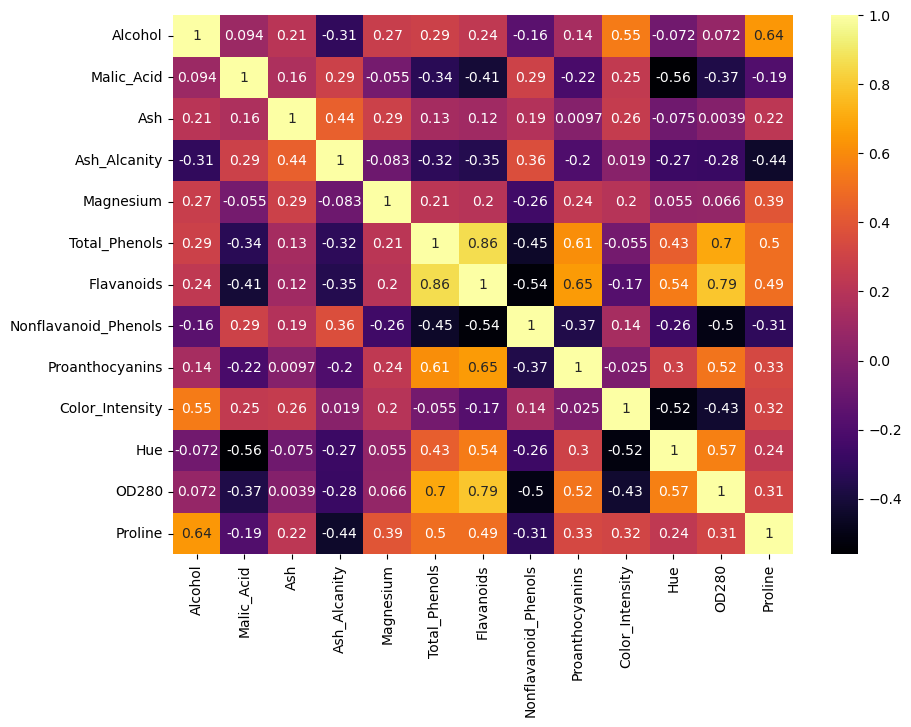

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)

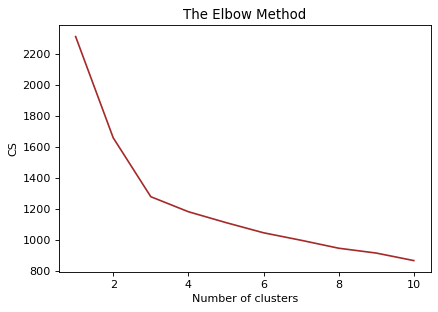

In [7]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 11), cs, color='brown')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans.fit_predict(df)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


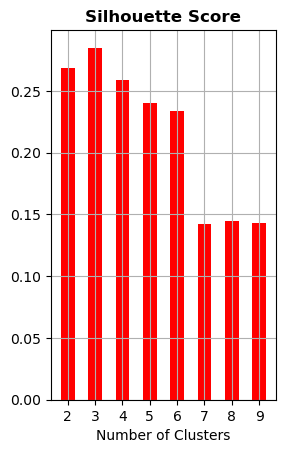

In [21]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df)
    silhouette[i] = silhouette_score(df, kmeans.labels_, metric='euclidean')
plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

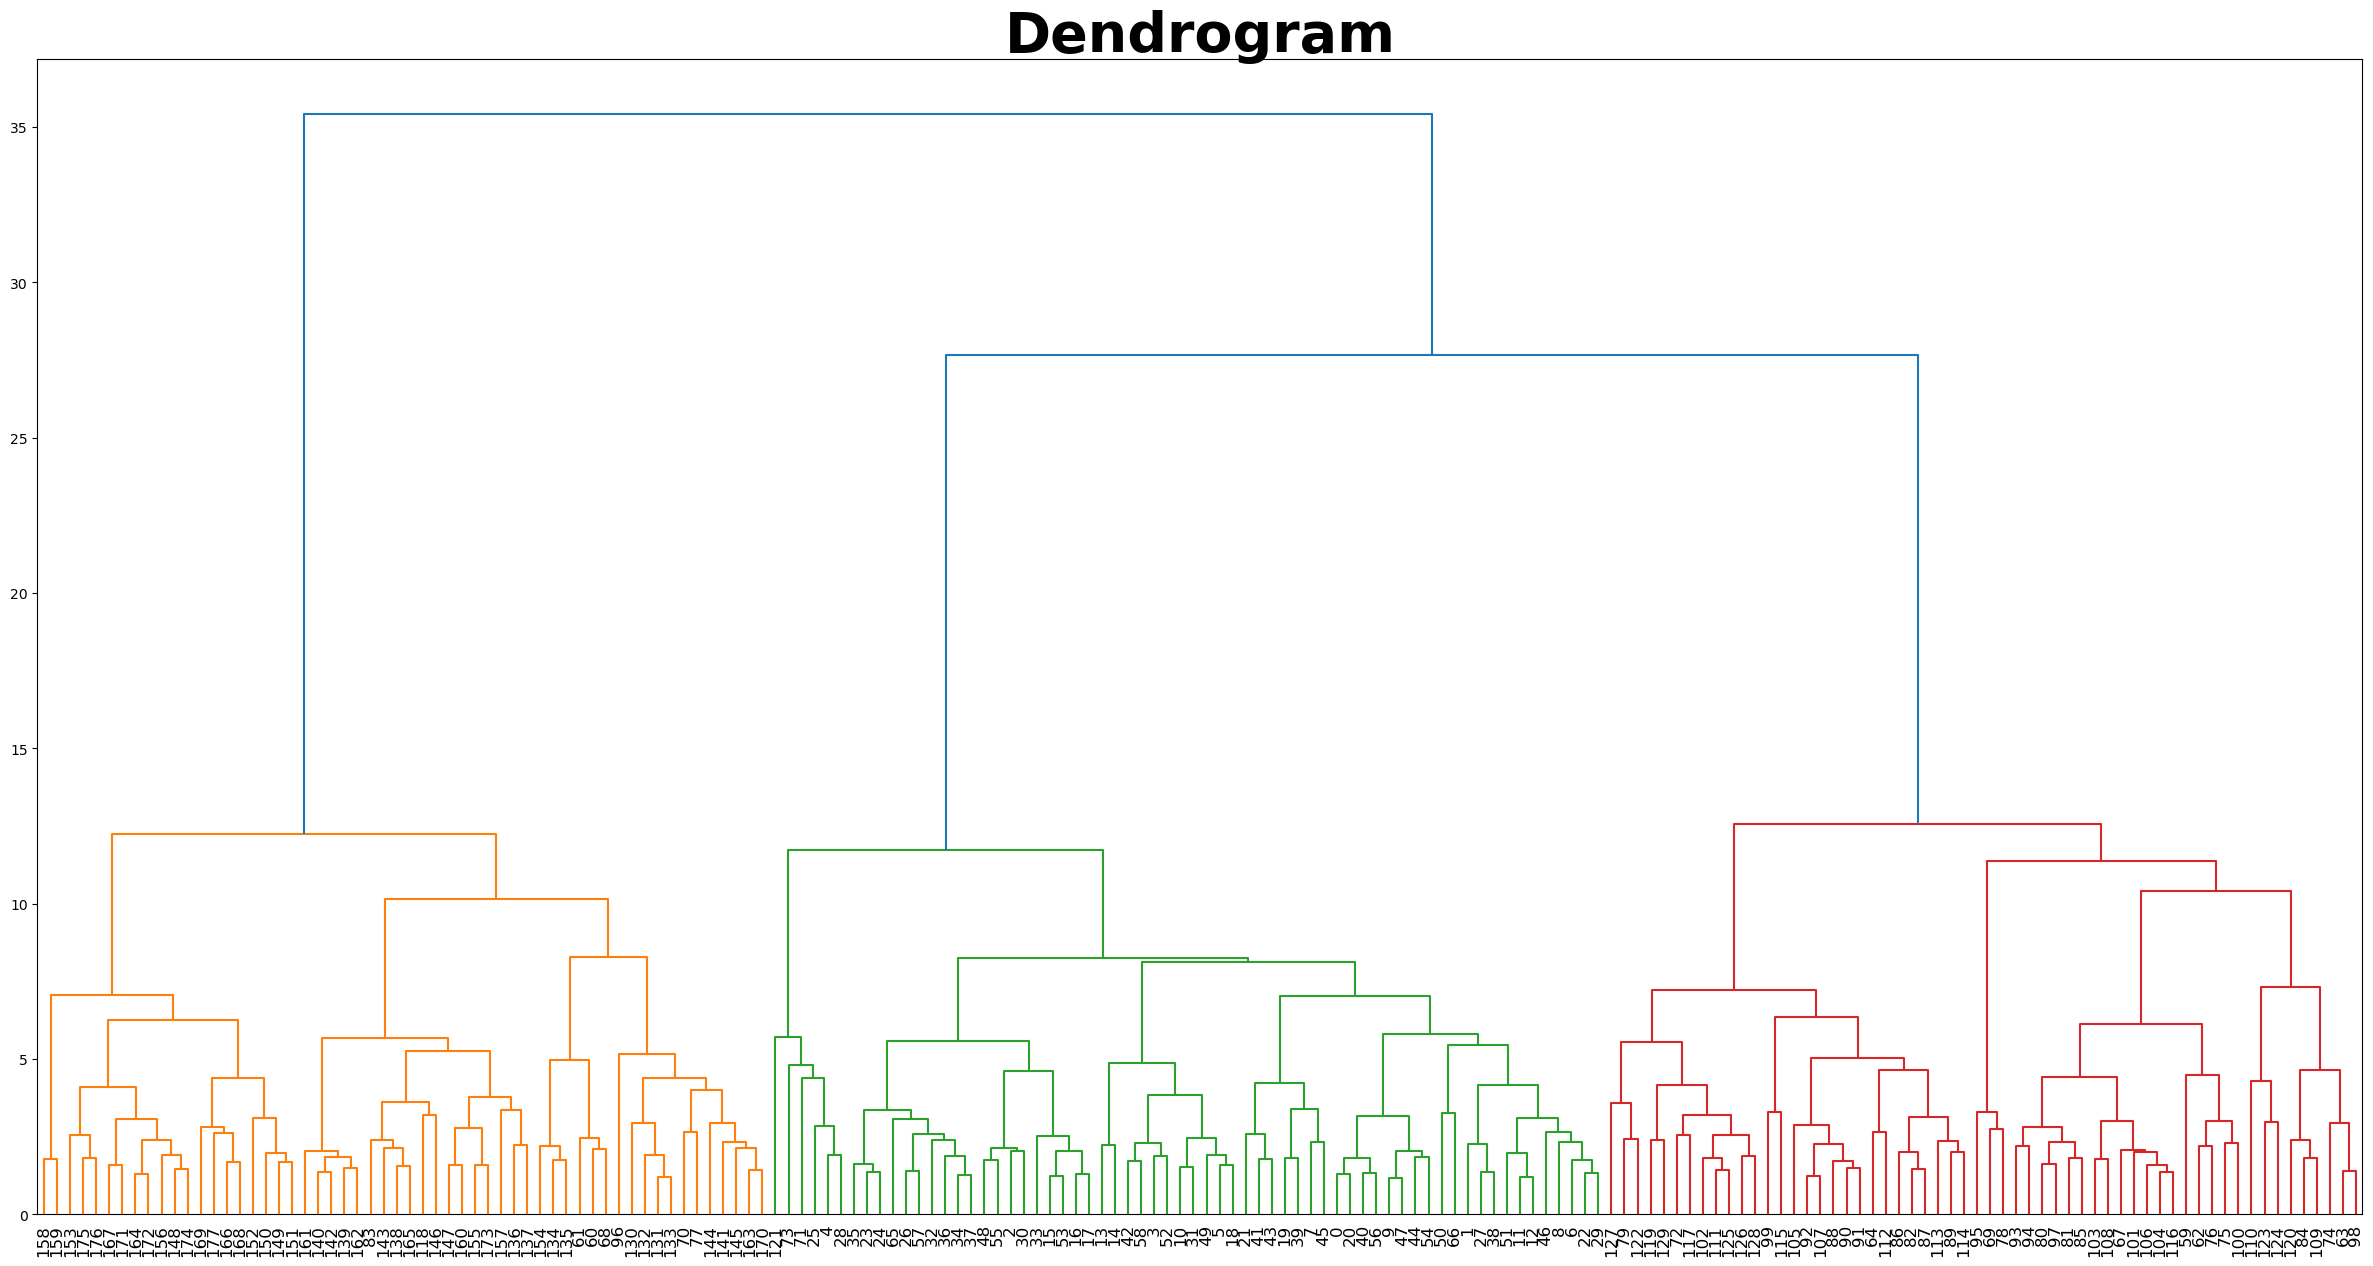

In [13]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 15))

shc.dendrogram(shc.linkage(df, method='ward'))
plt.xticks(fontsize = 12)
plt.title("Dendrogram", fontweight = 'bold', fontsize = 40)
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 
ACluster = AgglomerativeClustering(n_clusters = 3,
                                      linkage = 'ward')

In [15]:
ACluster.fit(df)

AgglomerativeClustering(n_clusters=3)

In [16]:
from sklearn.metrics import silhouette_score
labels = ACluster.labels_
labels
silhouette = silhouette_score(df, labels)

print('Silhouette', round(silhouette,3))


Silhouette 0.277


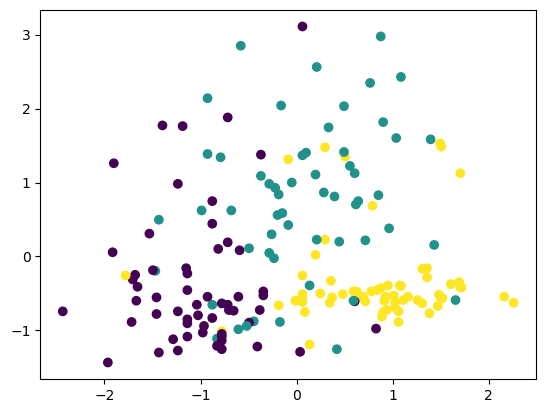

In [23]:
ac = AgglomerativeClustering(n_clusters = 3)
predict = ac.fit_predict(df)
    
plt.scatter(df[:, 0], df[:, 1], c = predict)
plt.show()

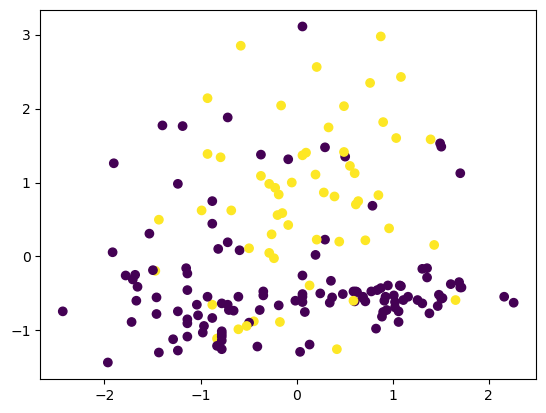

In [24]:
ac = AgglomerativeClustering(n_clusters = 2)
predict = ac.fit_predict(df)
    
plt.scatter(df[:, 0], df[:, 1], c = predict)
plt.show()

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


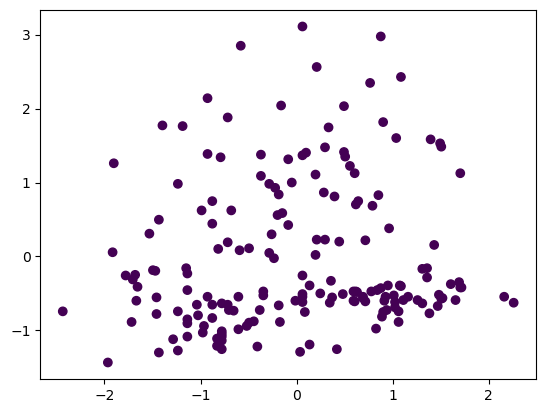

In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.45,min_samples=3) 
label = dbscan.fit_predict(df)
print(label)
plt.scatter(df[:,0], df[:,1], c=label)
plt.show()


[0 4 0 0 7 0 4 4 0 0 0 4 4 0 0 7 7 7 0 4 0 4 4 4 4 7 4 4 7 4 7 0 4 7 4 4 4
 4 4 0 0 4 0 4 4 4 0 0 0 0 0 4 0 7 4 0 0 4 0 5 8 8 5 5 8 8 5 5 8 6 8 1 5 7
 5 5 5 8 6 1 5 5 8 2 1 5 8 8 8 8 8 8 8 1 5 6 8 5 5 1 5 5 1 5 5 8 5 8 5 1 1
 1 8 8 8 8 5 1 2 1 1 7 1 1 1 1 1 8 1 1 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 3 3 3 3 3 3 3 2 3 2 3 3 2 2 2 2 3 2 3 3 3 3 2 2 3 2 3 3 3 3]


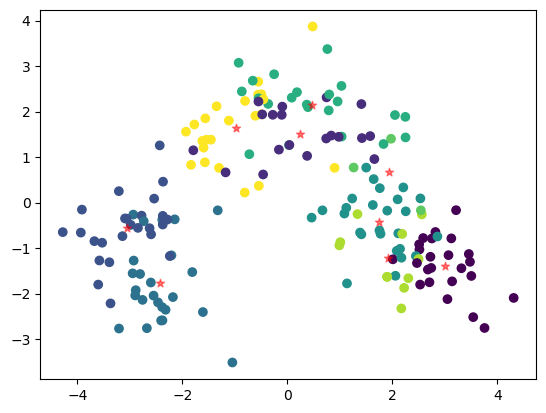

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(df)
df_pca = pca.transform(df)
kmeans.fit(df_pca)
label_pca = kmeans.fit_predict(df_pca)
print(label_pca)
plt.scatter(df_pca[:,0], df_pca[:,1], c=label_pca)
centers_PCA = kmeans.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='red', marker='*',alpha=0.5)
plt.show()

feature scaling:          0         1         2         3         4         5         6   \
0  0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1  0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2  0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3  0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4  0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   

         7         8         9         10        11        12  
0  0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1  0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2  0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3  0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4  0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  
[5 5 5 5 6 5 5 6 5 5 5 5 5 5 5 5 5 6 5 6 5 1 6 6 6 6 6 5 6 5 5 5 6 6 6 6 6
 6 6 1 5 1 5 1 6 1 5 5 5 5 5 5 5 5 5 5 5 5 5 3 8 8 3 3 8 3 3 3 8 0 8 6 3 

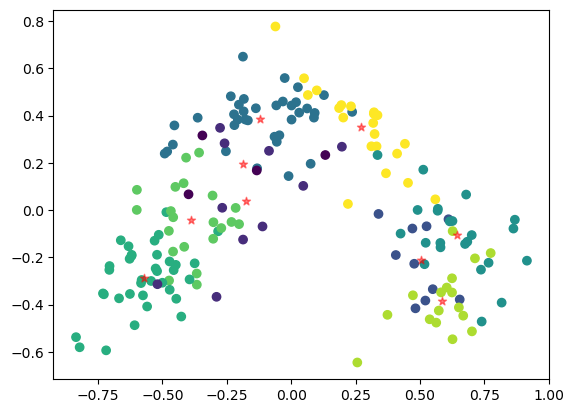

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
data_std = sc.fit_transform(df)
data_std = pd.DataFrame(data_std)
mm = MinMaxScaler()
mm_scale = mm.fit(data_std)
data_mm = mm_scale.transform(data_std)
print("feature scaling:",pd.DataFrame(data_mm).head())
pca = PCA(n_components = 0.95)
pca.fit(data_mm)
df_pca = pca.transform(data_mm)
kmeans.fit(df_pca)
label_pca = kmeans.fit_predict(df_pca)
print(label_pca)
plt.scatter(df_pca[:,0], df_pca[:,1], c=label_pca)
centers_PCA = kmeans.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='red', marker='*',alpha=0.5)
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  1  1  0  0  0  0 -1  0  1 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


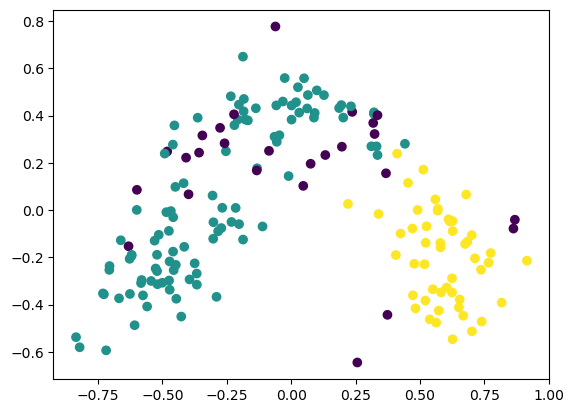

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.45,min_samples=3)
label = dbscan.fit_predict(df_pca)
print(label)
plt.scatter(df_pca[:,0], df_pca[:,1], c=label)
plt.show()